In [55]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, Convolution1D, Convolution2D
from keras.regularizers import l2, activity_l2

from random import randint
from keras.layers import Merge, LSTM, Dense
# Features: ['Adj_Close', 'Close', 'Date', 'High', 'Low', 'Open', 'Symbol', 'Volume']
#from sklearn import preprocessing

testData = np.genfromtxt('testData.txt', dtype = None)


In [66]:
# Part 1  
# One single featuere
X0 = [] # Adj_Close
X1 = [] #
X2 = [] #
X3 = [] #
X4 = [] # High
X5 = [] #

for tuple in testData:
    X4.append(tuple[4])
#####(..)start
#X4n2= preprocessing.normalize(X4) #,norm='l2')
#X4n2=X4n2[0]
#####(..)end
size = 1000
window = 25
X = np.empty([0, window])
Y = np.zeros(size)
batchSize = 10

for i in range(size):
    start = randint(0, len(testData)-window-1)
    X = np.concatenate((X, np.asarray(X4[start : start + window]).reshape(1, window)), axis = 0)
##(..)
    Y[i] = X4[start + window]
print(X.shape)
print(Y.shape)
print X[0]
print Y[0]
    
model = Sequential()
model.add(Dense(1, input_dim = window))
model.compile(optimizer='rmsprop',loss='mse') # for a mean squared error regression problem
history = model.fit(X, Y, validation_split=0.33, batch_size=batchSize, nb_epoch=100, initial_epoch=0)
print(history)

(1000, 25)
(1000,)
[ 40.220001  40.68      40.860001  39.799999  40.169998  40.360001
  40.689999  41.549999  41.709999  41.810001  41.950001  42.43      42.380001
  41.73      42.07      42.259998  41.630001  41.240002  41.41      41.169998
  42.049999  42.490002  43.25      43.119999  43.369999]
43.220001
Train on 669 samples, validate on 331 samples
Epoch 1/100
669/669 [==============================] - 1s - loss: 8685.0318 - val_loss: 3673.1292
Epoch 2/100
669/669 [==============================] - 0s - loss: 1425.1572 - val_loss: 106.2806

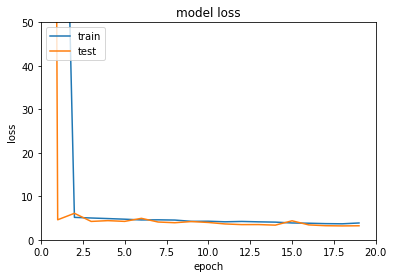

In [57]:
plt.axis((0, 20, 0, 50))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
training_loss = model.evaluate(X, Y, batch_size=batchSize, verbose=1)
print("\nMSE: {}".format(training_loss))

 580/1000 [================>.............] - ETA: 0s
MSE: 3.28683980942


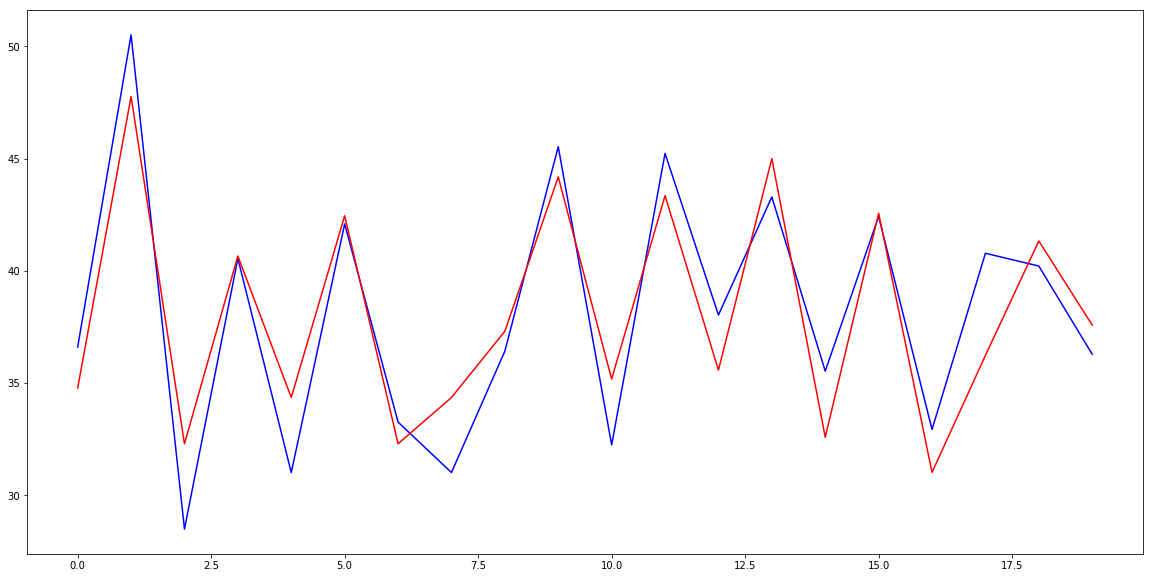

 840/1000 [========================>.....] - ETA: 0s

In [59]:
scope = 20  # should be smaller than len(Y)
YHat = model.predict(X, batch_size=batchSize, verbose=0)
YHat = np.ravel(YHat)
x = np.arange(0, scope)
plt.figure(figsize=(20,10))
plt.plot(x, Y[0:scope], 'b', x, YHat[0:scope], 'r')
plt.show()
training_loss = model.evaluate(X, Y, batch_size=batchSize, verbose=1)

In [60]:
# Part 2
# Multiple featueres
# X0 = [] # Adj_Close
# X1 = [] #
# X2 = [] #
# X3 = [] #
# X4 = [] # High
# X5 = [] #

# Features: ['Adj_Close', 'Close', 'Date', 'High', 'Low', 'Open', 'Symbol', 'Volume']

# make feature 2 - dates to be number comvertable
for tuple in testData:
    tuple[2] = tuple[2].replace("-", "")
    
# convert feature 6 - stock name to be stock-id (Yahoo == 1)
for tuple in testData:
    tuple[6] = 1

# 7 features so far
data = [[], [], [], [], [], [], [],[]]  #add []
for tuple in testData:
    for i in range(len(data)):
            data[i].append(float(tuple[i]))

#print data[7]#(..)
# Remove redunt features
# Features: ['Adj_Close', 'Close', 'Date', 'High', 'Low', 'Open', 'Symbol', 'Volume']
data = [data[0], data[1], data[3], data[4], data[5],data[7]]
            
# convert data into numpy 2d array
data = np.asarray(data)   

print(data.shape)

# print(X)
#print data[0]

(6, 756)


In [61]:
size = 1000
window = 25

# Three dim
# dim1: each datum
# dim2: TimeStep: a sequence of consecutive values 
# dim3: Feature Dimention: There are 7 features
X = np.empty([0, window, len(data)])  
Y = np.zeros(size)
batchSize = 20

print(data.shape)
print(X.shape)
print(data[:, 0:0 + window].shape)
for i in range(size):
    start = randint(0, len(testData)-window-1)
    oneSlice = data[:, start:start + window].T
    # to concatenate, we need to reshape one slice to 3d
    X = np.concatenate((X, np.asarray(oneSlice).reshape(1, window, len(data))), axis = 0) 
    Y[i] = data[2][start + window]    # Need to figure out which is high 
# print(X)
# X = X.reshape(len(X), len(data)*window)
print(X.shape)

(6, 756)
(0, 25, 6)
(6, 25)
(1000, 25, 6)


In [62]:
# BestParameter so far, mse = 7.5
# model.add(LSTM(80, input_shape=(window, len(data))))
# model.add(Dense(70))
# model.add(Dense(50))
# model.add(Dense(30))
# model.add(Dense(10))
# model.add(Dense(1))

# mse = 6.9
# model.add(Convolution1D(len(data), window*0.5, border_mode='same', input_shape=(window, len(data))))
# model.add(LSTM(int(p*0.8), input_shape=(window, len(data))))
# model.add(Dense(p*0.6))
# model.add(Dense(p*0.3))
# model.add(Dense(p*0.1))
# model.add(Dense(3))
# model.add(Dense(1))

In [64]:
model = Sequential()
p = window*len(data)
print(p)
# model.add(Convolution1D(64, 3, border_mode='same', input_shape=(10, 32)))
model.add(Convolution1D(len(data), window*0.2, border_mode='same', input_shape=(window, len(data))))
model.add(LSTM(int(p*0.4), input_shape=(window, len(data))))
model.add(Dense(p*0.3))
model.add(Dense(p*0.1))
model.add(Dense(3))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse') # a mean squared error regression problem
history = model.fit(X, Y, validation_split=0, batch_size=batchSize, nb_epoch=20, initial_epoch=0)
print(history)

150
Epoch 1/20
1000/1000 [==============================] - 9s - loss: 988.4523        